In [1]:
#モジュールインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [257]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [223]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [129]:
def kesson_table(df):
    null_val = df.isnull().sum()
    per = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val,per],axis=1)
    kesson_table = kesson_table.rename(columns={0:'lost count',1:'lost per'})
    return kesson_table

In [130]:
kesson_table(train_df)

,lost count,lost per
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [131]:
kesson_table(test_df)

,lost count,lost per
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,4,0.274160
LotFrontage,227,15.558602
LotArea,0,0.000000
Street,0,0.000000
Alley,1352,92.666210
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,2,0.137080


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


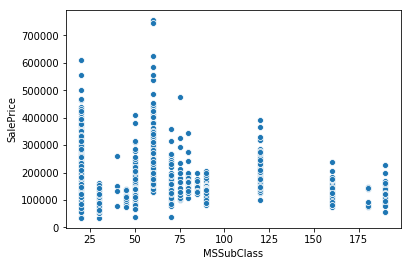

In [24]:
print(train_df['MSSubClass'].value_counts())
sns.scatterplot(x='MSSubClass',data=train_df,y='SalePrice')

In [22]:
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

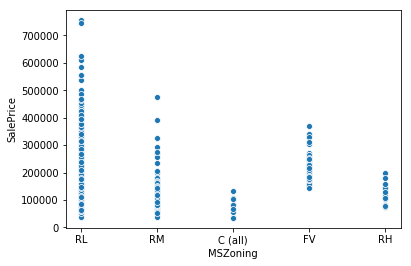

In [23]:
sns.scatterplot(x='MSZoning',data=train_df,y='SalePrice')

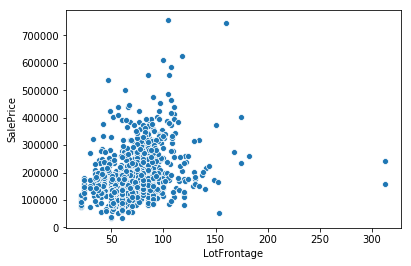

In [27]:
sns.scatterplot(x='LotFrontage',data=train_df,y='SalePrice')

In [28]:
train_df['LotArea'].value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
9750      5
10400     5
5400      5
7018      4
11700     4
9375      4
8800      4
9900      4
8750      4
6600      4
         ..
3136      1
13418     1
10448     1
8849      1
7313      1
11425     1
13472     1
8029      1
11952     1
9738      1
12936     1
5271      1
11414     1
12122     1
9364      1
7314      1
9360      1
16226     1
11404     1
15498     1
9353      1
11400     1
14175     1
7301      1
11394     1
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

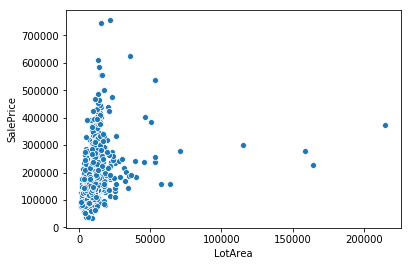

In [29]:
sns.scatterplot(x='LotArea',data=train_df,y='SalePrice')

In [55]:

graghType = 'scatter'

def describe_gragh(df):
    columns = df.columns.values
    for column in columns:
        print('column name : {}'.format(column))
        print(df[column].value_counts())
        print('null count>-- {}'.format(df[column].isnull().sum()))
        if graghType is 'scatter':
            sns.scatterplot(x=column,y='SalePrice',data=train_df)
            plt.show()

column name : Id
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
null count>-- 0


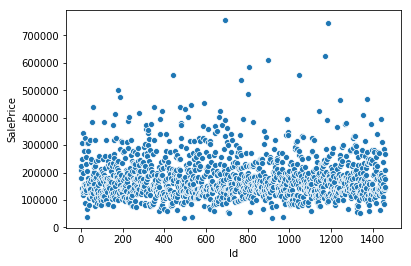

column name : MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
null count>-- 0


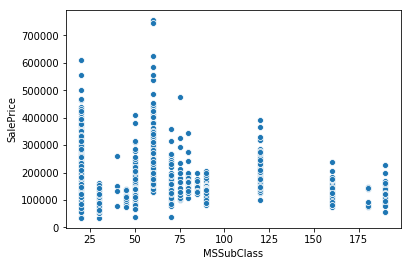

column name : MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
null count>-- 0


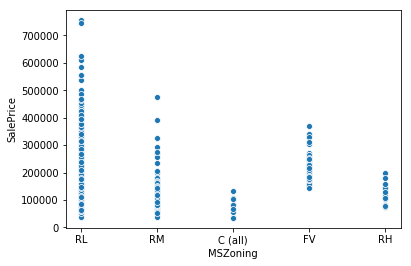

column name : LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
null count>-- 259


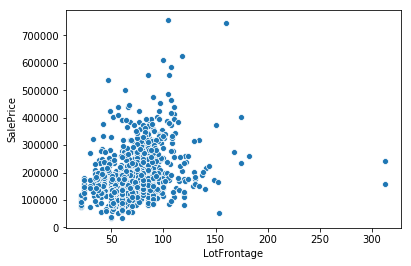

column name : LotArea
7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
3182      7
7800      6
8450      6
10000     5
4500      5
4435      5
5000      5
10140     5
9750      5
10400     5
5400      5
7018      4
11700     4
9375      4
8800      4
9900      4
8750      4
6600      4
         ..
3136      1
13418     1
10448     1
8849      1
7313      1
11425     1
13472     1
8029      1
11952     1
9738      1
12936     1
5271      1
11414     1
12122     1
9364      1
7314      1
9360      1
16226     1
11404     1
15498     1
9353      1
11400     1
14175     1
7301      1
11394     1
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
null count>-- 0


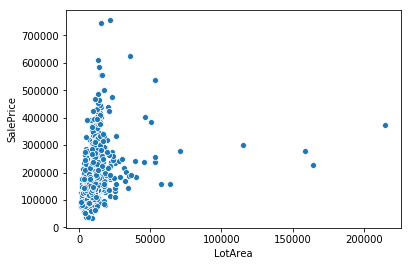

column name : Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
null count>-- 0


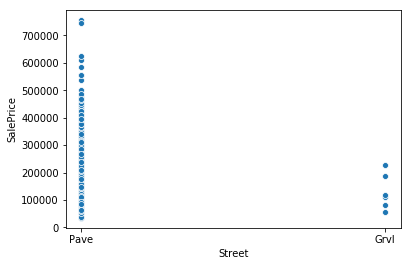

column name : Alley
0    1369
1      50
2      41
Name: Alley, dtype: int64
null count>-- 0


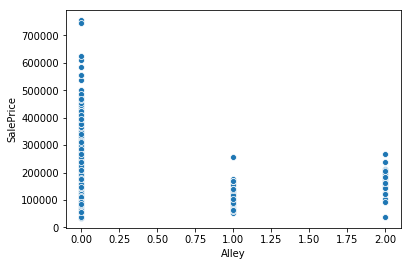

column name : LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
null count>-- 0


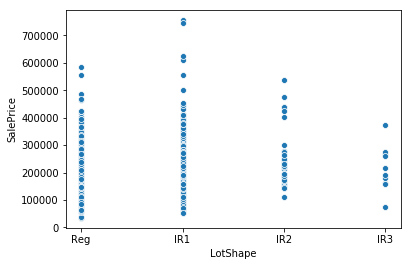

column name : LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
null count>-- 0


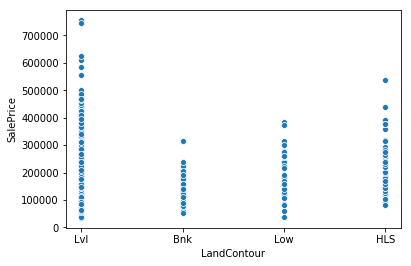

column name : Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
null count>-- 0


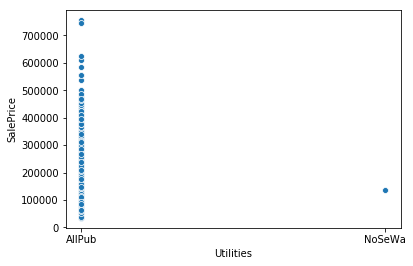

column name : LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
null count>-- 0


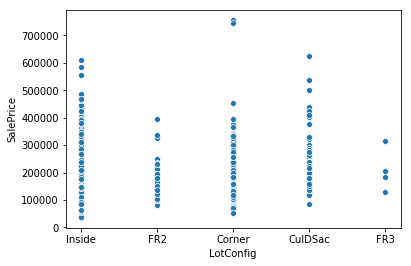

column name : LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
null count>-- 0


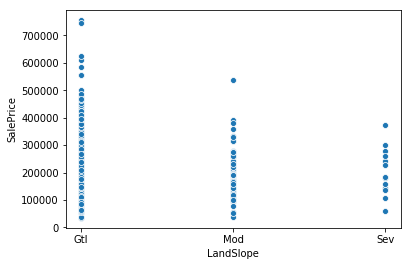

column name : Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
null count>-- 0


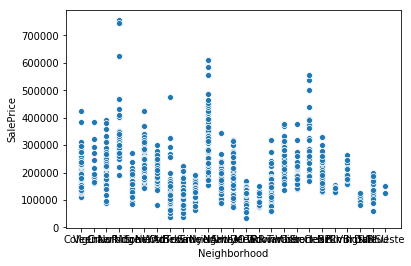

column name : Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
null count>-- 0


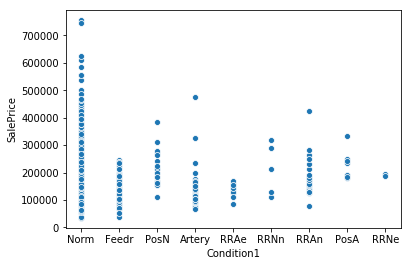

column name : Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
null count>-- 0


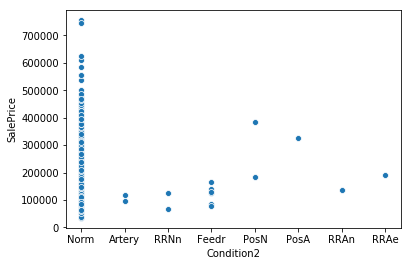

column name : BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
null count>-- 0


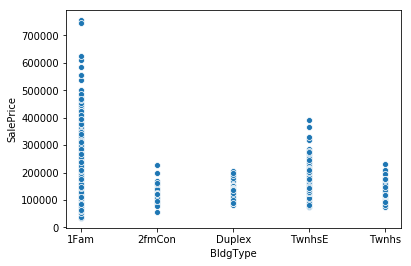

column name : HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
null count>-- 0


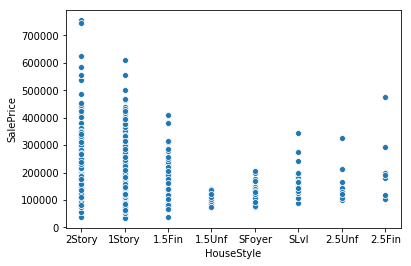

column name : OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
null count>-- 0


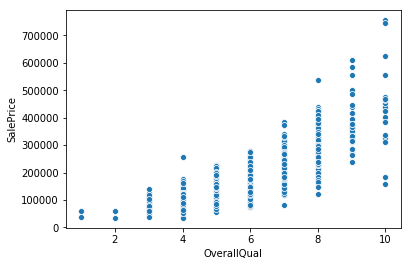

column name : OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
null count>-- 0


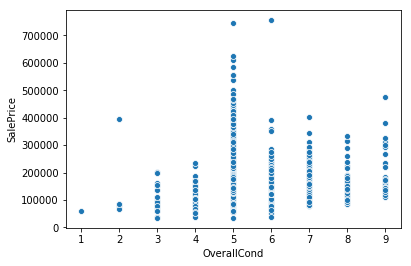

column name : YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64
null count>-- 0


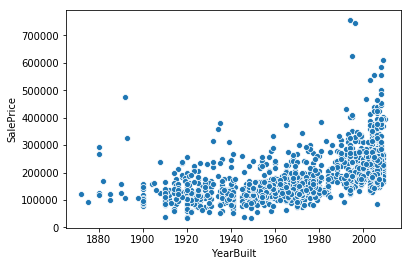

column name : YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
null count>-- 0


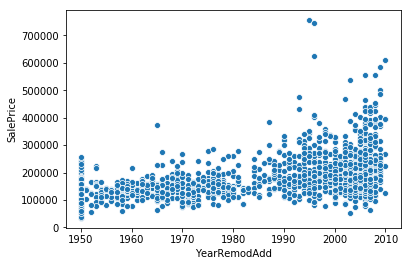

column name : RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
null count>-- 0


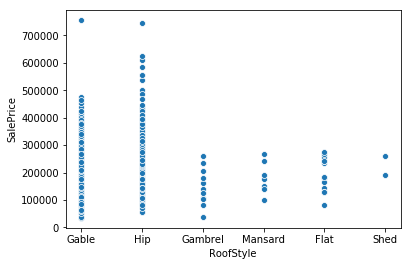

column name : RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64
null count>-- 0


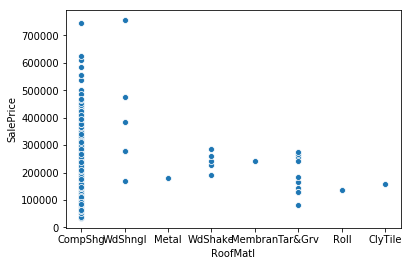

column name : Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
null count>-- 0


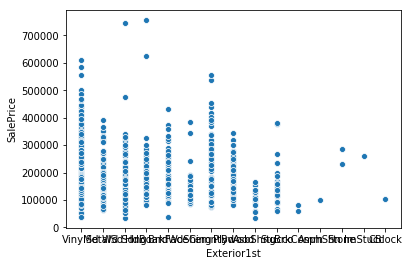

column name : Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
null count>-- 0


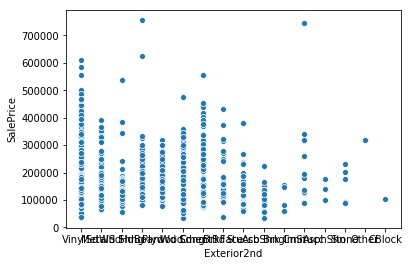

column name : MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
null count>-- 8


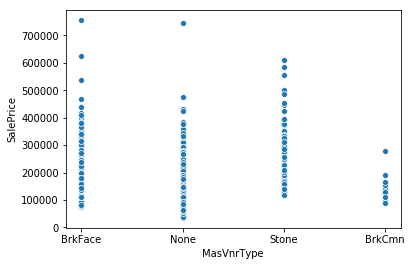

column name : MasVnrArea
0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64
null count>-- 8


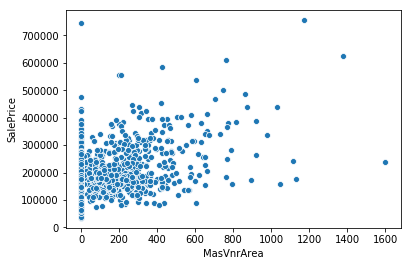

column name : ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
null count>-- 0


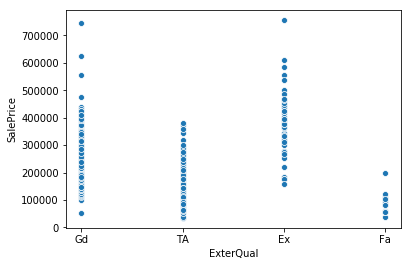

column name : ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
null count>-- 0


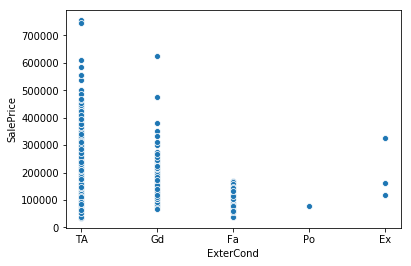

column name : Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
null count>-- 0


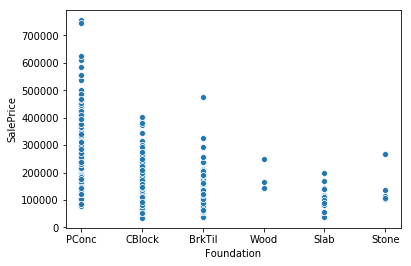

column name : BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
null count>-- 37


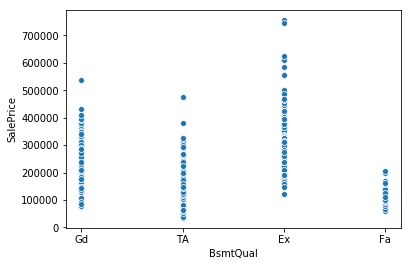

column name : BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
null count>-- 37


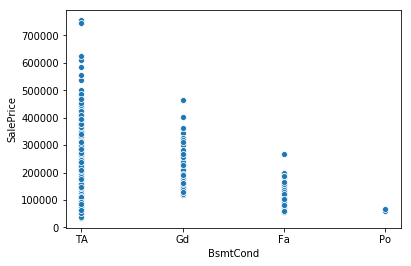

column name : BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
null count>-- 38


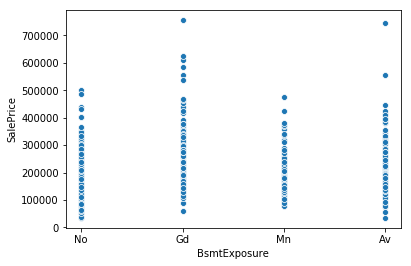

column name : BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
null count>-- 37


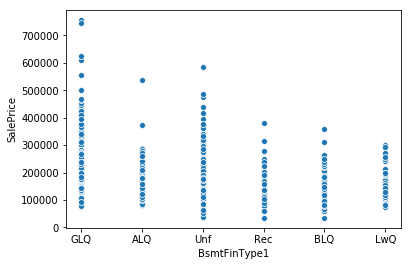

column name : BsmtFinSF1
0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
560       4
588       4
547       4
504       4
600       4
553       4
674       3
1036      3
403       3
672       3
       ... 
642       1
644       1
645       1
607       1
1014      1
1071      1
572       1
554       1
556       1
559       1
1070      1
562       1
564       1
566       1
1064      1
568       1
1053      1
573       1
602       1
575       1
1046      1
580       1
585       1
586       1
592       1
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64
null count>-- 0


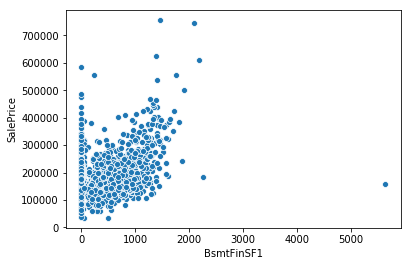

column name : BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
null count>-- 38


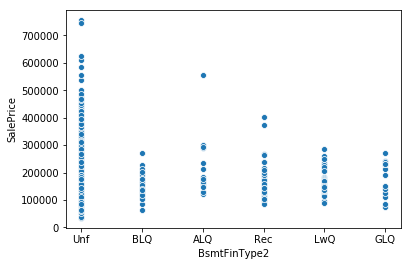

column name : BsmtFinSF2
0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
        ... 
354        1
1080       1
1127       1
375        1
377        1
380        1
396        1
400        1
411        1
420        1
435        1
438        1
441        1
465        1
466        1
472        1
479        1
486        1
491        1
492        1
495        1
499        1
500        1
506        1
531        1
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64
null count>-- 0


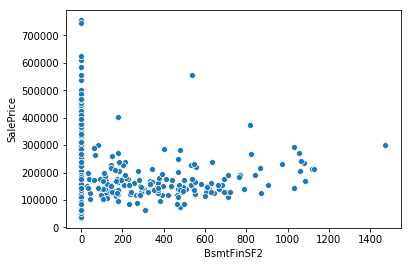

column name : BsmtUnfSF
0       118
728       9
384       8
572       7
600       7
300       7
440       6
625       6
280       6
672       6
270       6
162       5
108       5
490       5
390       5
80        5
326       5
816       5
698       5
319       5
264       5
216       5
410       5
638       4
768       4
780       4
660       4
420       4
840       4
556       4
       ... 
707       1
705       1
701       1
693       1
721       1
692       1
691       1
690       1
1515      1
680       1
1528      1
717       1
722       1
758       1
739       1
752       1
750       1
1497      1
744       1
741       1
740       1
735       1
724       1
734       1
733       1
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64
null count>-- 0


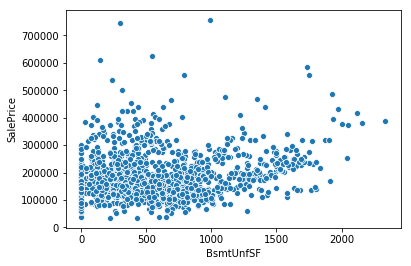

column name : TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
630      9
756      9
952      9
1056     8
936      8
1008     7
483      7
840      7
384      7
720      7
600      7
1362     6
876      6
858      6
884      6
1392     6
796      6
793      5
        ..
1414     1
1413     1
1410     1
1452     1
1022     1
1021     1
998      1
982      1
983      1
984      1
985      1
1479     1
1477     1
1476     1
993      1
1475     1
1473     1
999      1
1020     1
1001     1
1002     1
1003     1
1005     1
1006     1
1007     1
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64
null count>-- 0


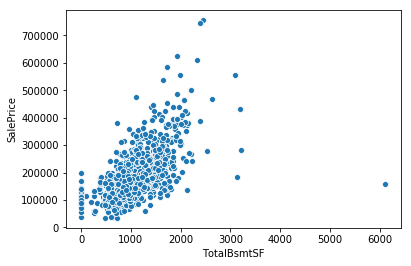

column name : Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
null count>-- 0


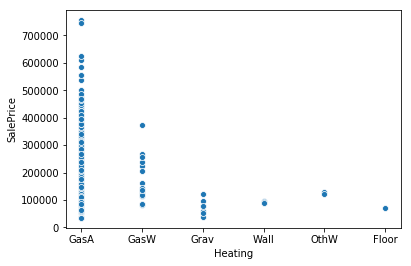

column name : HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
null count>-- 0


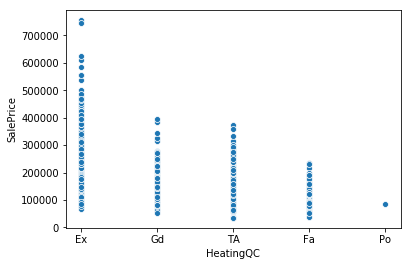

column name : CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64
null count>-- 0


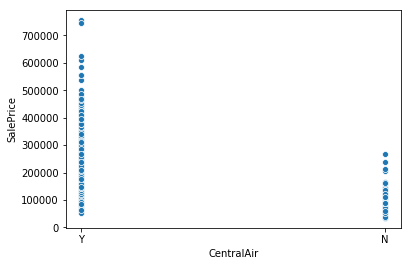

column name : Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
null count>-- 1


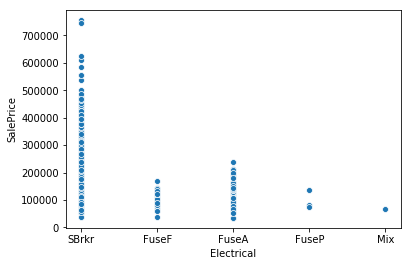

column name : 1stFlrSF
864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
796      5
1494     5
1422     5
520      5
1072     5
1080     5
616      5
798      5
1236     5
958      5
        ..
1223     1
1225     1
1229     1
1235     1
1238     1
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1272     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64
null count>-- 0


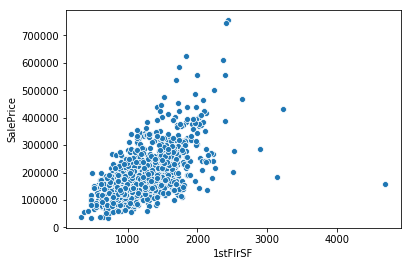

column name : 2ndFlrSF
0       829
728      10
504       9
672       8
546       8
720       7
600       7
896       6
780       5
862       5
689       5
840       5
756       5
702       4
739       4
551       4
741       4
878       4
804       4
670       3
660       3
1254      3
793       3
668       3
795       3
742       3
832       3
684       3
846       3
807       3
       ... 
811       1
812       1
1097      1
817       1
826       1
828       1
1096      1
830       1
831       1
1093      1
1092      1
1104      1
798       1
1106      1
1121      1
769       1
772       1
776       1
778       1
779       1
1122      1
784       1
796       1
1120      1
787       1
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64
null count>-- 0


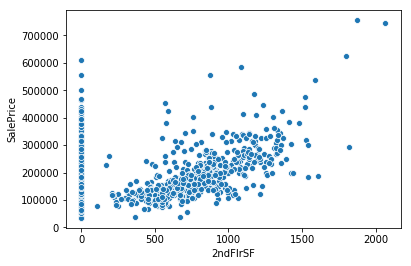

column name : LowQualFinSF
0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
null count>-- 0


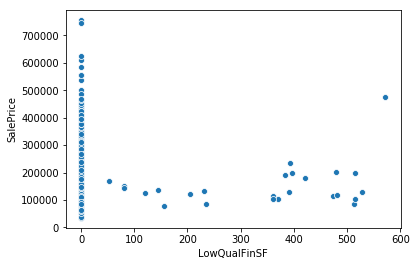

column name : GrLivArea
864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
        ..
1357     1
1347     1
1453     1
1346     1
1343     1
1342     1
1338     1
1334     1
1327     1
1322     1
1385     1
1386     1
1387     1
1391     1
1446     1
3493     1
1436     1
1434     1
1429     1
1425     1
1411     1
1406     1
1405     1
1402     1
1400     1
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64
null count>-- 0


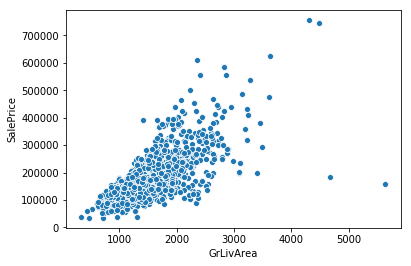

column name : BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
null count>-- 0


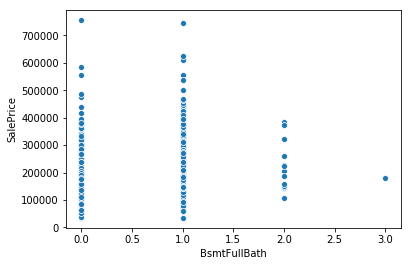

column name : BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
null count>-- 0


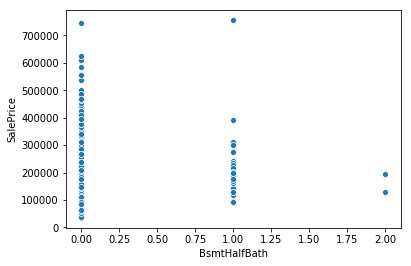

column name : FullBath
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
null count>-- 0


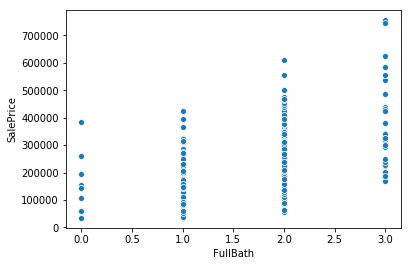

column name : HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64
null count>-- 0


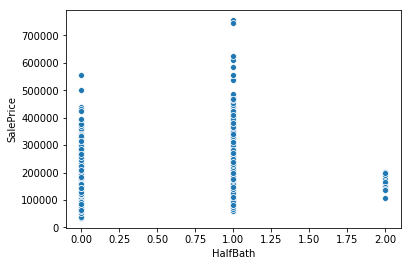

column name : BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
null count>-- 0


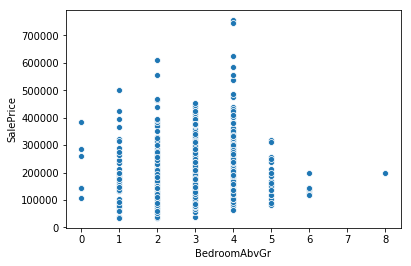

column name : KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
null count>-- 0


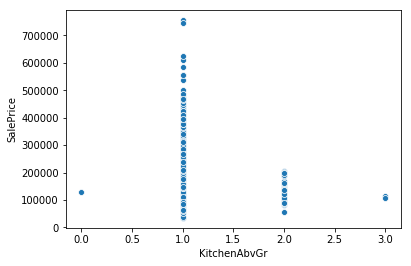

column name : KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
null count>-- 0


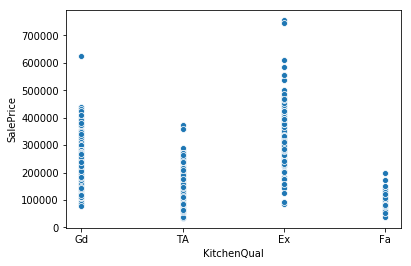

column name : TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
null count>-- 0


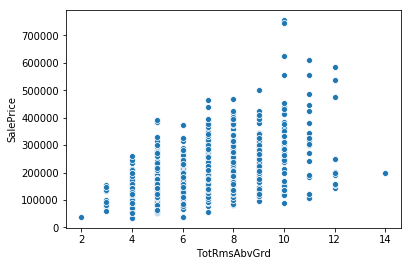

column name : Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
null count>-- 0


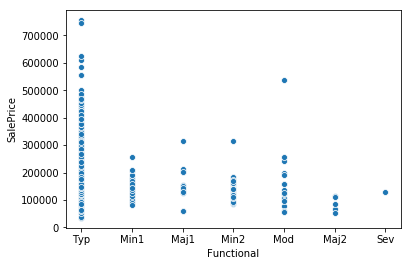

column name : Fireplaces
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
null count>-- 0


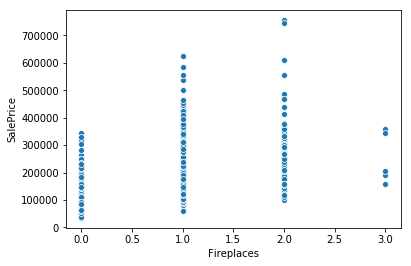

column name : FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
null count>-- 690


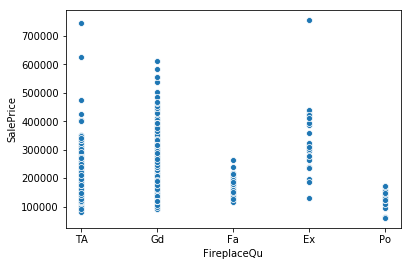

column name : GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
null count>-- 81


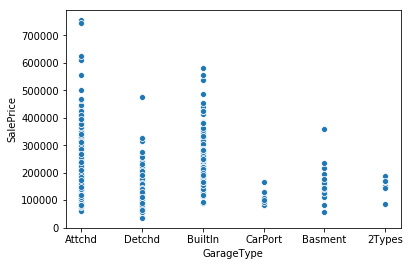

column name : GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
null count>-- 81


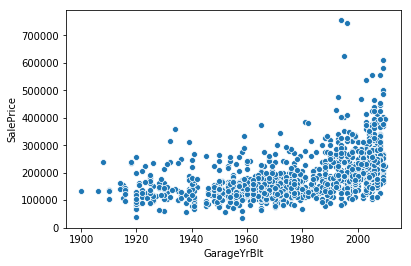

column name : GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
null count>-- 81


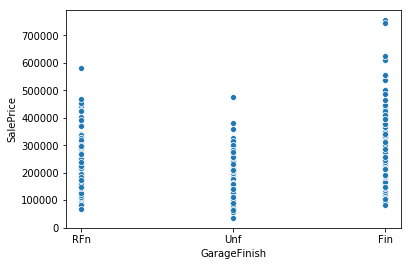

column name : GarageCars
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
null count>-- 0


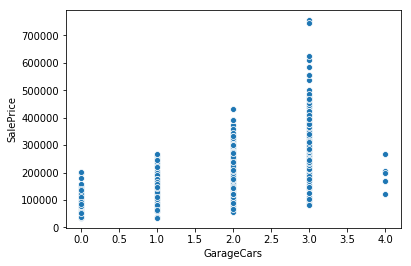

column name : GarageArea
0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
480     24
264     24
308     20
420     19
280     16
672     15
216     12
504     12
336     12
352     12
360     11
564     11
300     10
462     10
572     10
540     10
539      9
660      9
180      9
384      9
312      9
286      9
        ..
414      1
413      1
768      1
455      1
708      1
757      1
711      1
714      1
481      1
716      1
479      1
719      1
477      1
721      1
475      1
722      1
726      1
732      1
738      1
739      1
740      1
748      1
749      1
752      1
753      1
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64
null count>-- 0


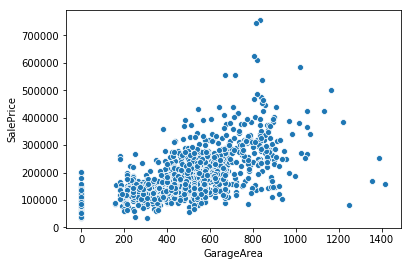

column name : GarageQual
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
null count>-- 81


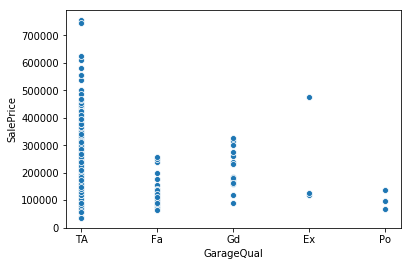

column name : GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
null count>-- 81


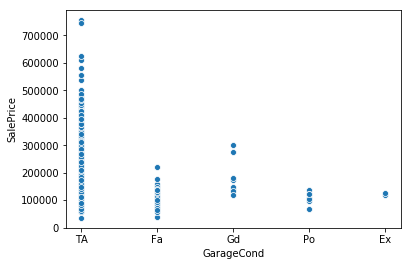

column name : PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
null count>-- 0


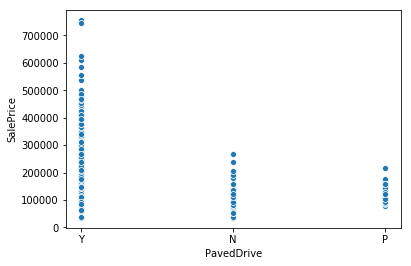

column name : WoodDeckSF
0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
240     10
208     10
216      9
180      8
160      8
250      6
132      6
264      6
143      6
96       6
156      6
171      5
48       5
196      5
105      5
288      5
210      5
220      4
158      4
104      4
147      4
74       4
      ... 
183      1
181      1
179      1
245      1
255      1
340      1
304      1
333      1
327      1
326      1
325      1
321      1
312      1
309      1
307      1
306      1
305      1
303      1
257      1
301      1
298      1
295      1
294      1
283      1
278      1
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64
null count>-- 0


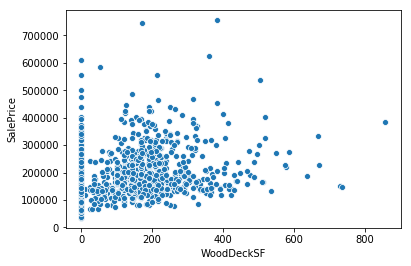

column name : OpenPorchSF
0      656
36      29
48      22
20      21
40      19
45      19
30      16
24      16
60      15
39      14
28      14
44      13
50      13
54      13
72      12
98      11
63      11
35      11
32      11
75      10
42      10
120     10
96      10
64       9
66       9
16       8
78       8
56       8
38       8
84       8
      ... 
123      1
523      1
118      1
117      1
106      1
103      1
101      1
95       1
94       1
93       1
134      1
137      1
199      1
141      1
195      1
191      1
189      1
188      1
187      1
185      1
182      1
180      1
176      1
175      1
174      1
159      1
156      1
148      1
142      1
119      1
Name: OpenPorchSF, Length: 202, dtype: int64
null count>-- 0


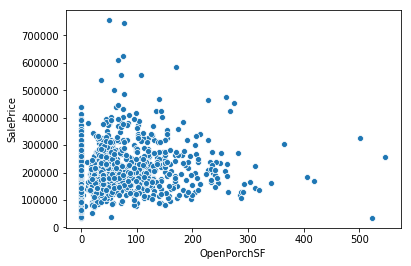

column name : EnclosedPorch
0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
       ... 
239       1
242       1
248       1
280       1
254       1
259       1
268       1
198       1
194       1
129       1
148       1
130       1
134       1
136       1
138       1
140       1
143       1
272       1
145       1
386       1
291       1
162       1
169       1
170       1
172       1
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64
null count>-- 0


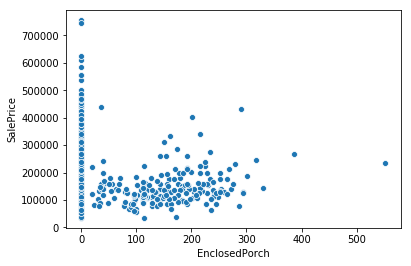

column name : 3SsnPorch
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
null count>-- 0


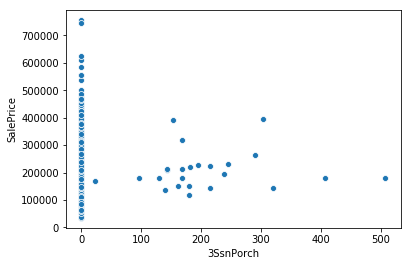

column name : ScreenPorch
0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
       ... 
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64
null count>-- 0


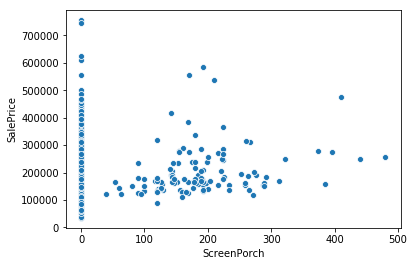

column name : PoolArea
0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
null count>-- 0


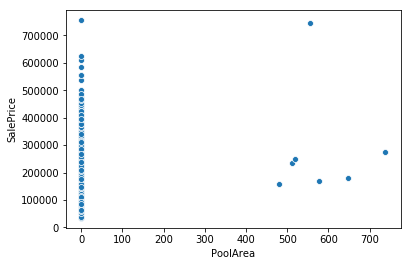

column name : PoolQC
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
null count>-- 1453


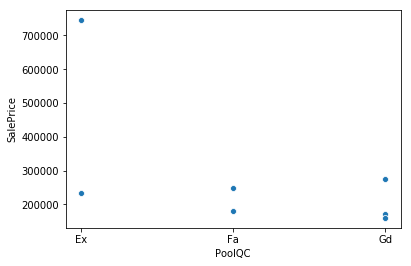

column name : Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
null count>-- 1179


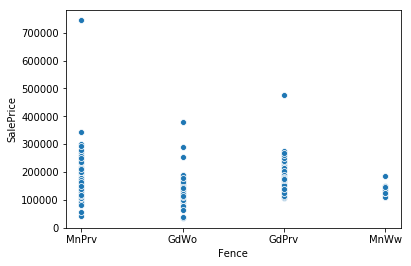

column name : MiscFeature
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
null count>-- 1406


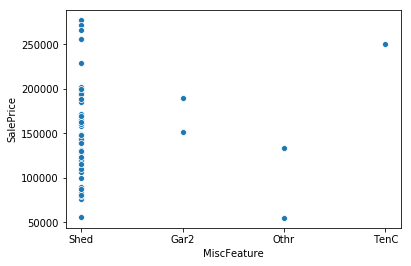

column name : MiscVal
0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64
null count>-- 0


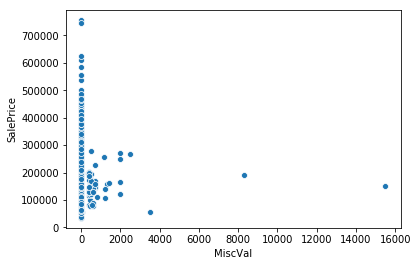

column name : MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
null count>-- 0


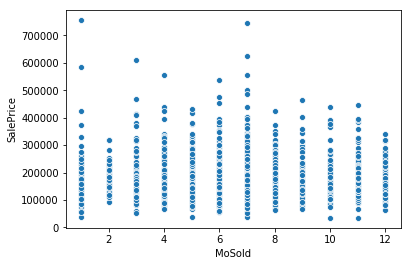

column name : YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
null count>-- 0


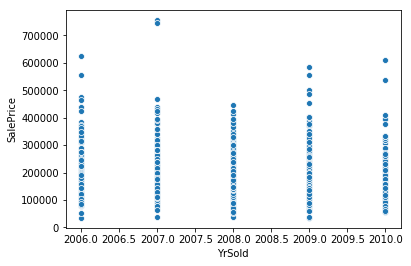

column name : SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
null count>-- 0


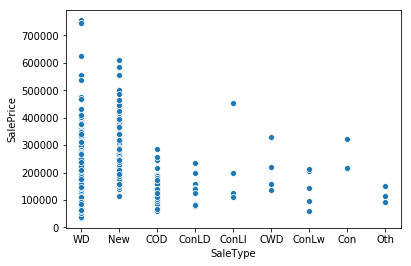

column name : SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
null count>-- 0


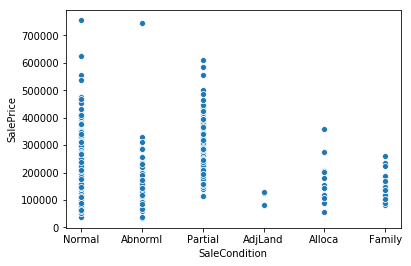

column name : SalePrice
140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64
null count>-- 0


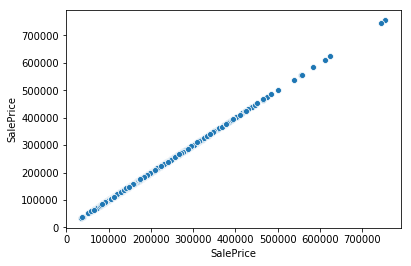

In [56]:
describe_gragh(train_df)

In [43]:
train_df['Alley'].value_counts()

0       1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [132]:
#路地なし：０
#train_df['Alley'] =train_df['Alley'].replace('Grvl',1)
#train_df['Alley'] =train_df['Alley'].replace('Pave',2)

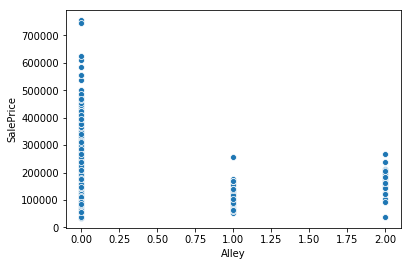

In [47]:
sns.scatterplot(x='Alley',data=train_df,y='SalePrice')

In [133]:
#リフォームの有無についてフラグを追加する
def add_rebuild_flg(build):
    yearBuilt,yearRemodAdd = build
    if yearBuilt == yearRemodAdd:
        return 0
    else:
        return 1

In [210]:
train_df['rebuild_flg'] = train_df[['YearBuilt','YearRemodAdd']].apply(add_rebuild_flg,axis=1)

In [211]:
train_df['rebuild_flg'].value_counts()

0    764
1    696
Name: rebuild_flg, dtype: int64

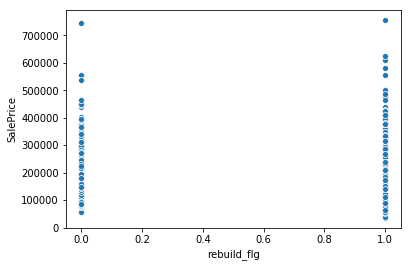

In [93]:
sns.scatterplot(x='rebuild_flg',data=train_df,y='SalePrice')

In [179]:
#建築日を10年ごとにしてみる。

In [136]:
#1870~2000年で10年ごとにサマル
def period_year(yearBuilt):
    yearBuilt = str(yearBuilt)
    char = yearBuilt[2]
    #print(char)
    if char is '0':
        year = yearBuilt[0:2]+'00'
        #print(year)
        return int(year)
    else:
        year = yearBuilt[0:3]+'0'
        #print(year)
        return int(year)

In [212]:
train_df['yearPeriod'] = train_df['YearBuilt'].apply(period_year)

In [213]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,rebuild_flg,yearPeriod
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,...,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500,0,2000
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,...,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500,0,1970
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,...,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500,1,2000
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,...,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000,1,1910
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,...,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000,0,2000


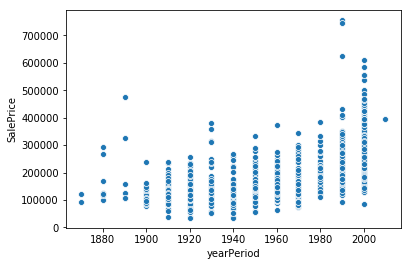

In [81]:
sns.scatterplot(x='yearPeriod',data=train_df,y='SalePrice')

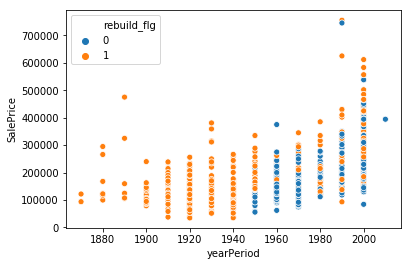

In [113]:
sns.scatterplot(x='yearPeriod',data=train_df,y='SalePrice',hue='rebuild_flg')

In [139]:
#ついでにリフォーム時期も年代にさまってみる
def period_rebuild(rebuild):
    yearRemodAdd,rebuild_flg = rebuild
    if rebuild_flg == 1:
            yearRemodAdd = str(yearRemodAdd)
            char = yearRemodAdd[2]
            #print(char)
            if char is '0':
                year = yearRemodAdd[0:2]+'00'
                #print(year)
                return int(year)
            else:
                year = yearRemodAdd[0:3]+'0'
                #print(year)
                return int(year)

In [214]:
#ノンリフォームは0のまま
train_df['rebuildPeriod'] = train_df[['YearRemodAdd','rebuild_flg']].apply(period_rebuild,axis=1)
train_df['rebuildPeriod'] = train_df['rebuildPeriod'].fillna(0)

In [215]:
train_df['rebuildPeriod'] = train_df['rebuildPeriod'].astype(int)

(1900, 2020)

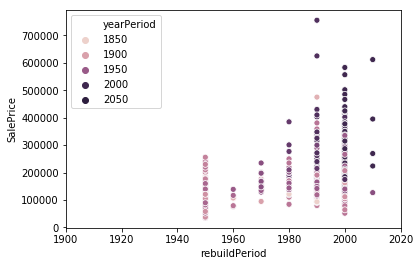

In [142]:
sns.scatterplot(x='rebuildPeriod',data=train_df,y='SalePrice',hue='yearPeriod')
plt.xlim(1900,2020)

In [143]:
train_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [115]:
#平方フィートの石材突き板面積の数値を50ずつで分類する。
#四捨五入
def my_round(val, digit=0):
    p = 10 ** digit
    return (val * p * 2 + 1) // 2 / p

In [116]:
def round_MasVnrArea(num):
    return int(my_round(num,-2))

In [217]:
#ゼロをいったんNanへ
train_df['MasVnrArea'][train_df['MasVnrType'] == 2] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [218]:
train_df[train_df['MasVnrArea']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,rebuild_flg,yearPeriod,rebuildPeriod
688,689,20,3,60.0,8089,1,2,3,1,0,4,0,22,2,2,0,2,8,6,2007,2007,1,1,8,8,1,0.0,2,4,2,2,3,0,2,945,5,0,474,1419,1,...,0,0,1419,1,0,2,0,2,1,2,7,6,1,2,1,2007.0,1,2,567,4,4,2,140,0,0,0,0,0,3,4,4,0,10,2007,6,5,392000,0,2000,0
1241,1242,20,3,83.0,9849,1,2,3,3,0,4,0,21,2,2,0,2,7,6,2007,2007,3,1,12,13,3,0.0,2,4,2,2,3,0,5,0,5,0,1689,1689,1,...,0,0,1689,0,0,2,0,3,1,2,7,6,0,5,1,2007.0,1,3,954,4,4,2,0,56,0,0,0,0,3,4,4,0,6,2007,6,5,248328,0,2000,0


In [219]:
train_df['MasVnrArea'].describe()

count     588.000000
mean      254.430272
std       205.620539
min         0.000000
25%       112.750000
50%       202.500000
75%       329.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [220]:
#Nan値に平均値をいれる
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)

In [221]:
#type None をゼロに戻す
train_df['MasVnrArea'][train_df['MasVnrType'] == 2] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
#四捨五入列を追加
train_df['roundMasVnr'] = train_df['MasVnrArea'].apply(round_MasVnrArea)

In [158]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,rebuild_flg,yearPeriod,rebuildPeriod,roundMasVnr
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,2000,0,200
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,1970,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,2000,2000,200
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1910,1970,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0,2000,0,400
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1,1990,1990,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1,2000,2000,200
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,0,1970,0,200
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1,1930,1950,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,...,0,10

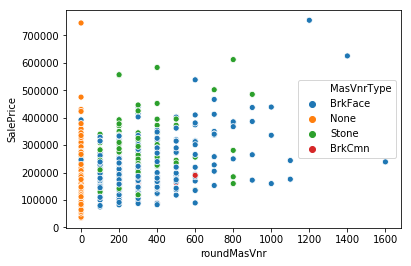

In [159]:
sns.scatterplot(x='roundMasVnr',data=train_df,y='SalePrice',hue='MasVnrType')

In [160]:
##変換を作成する
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [163]:
#train_df['MSZoning'] = train_df['MSZoning'].replace('RL',0).replace('RM',1).replace('FV',2).replace('RH',3).replace('C (all)',4)
#train_df['MSZoning'].value_counts()

0    1151
1     218
2      65
3      16
4      10
Name: MSZoning, dtype: int64

In [165]:
#train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)

In [166]:
train_df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [168]:
#train_df['Street'] = train_df['Street'].replace('Pave',0).replace('Grvl',1)

In [169]:
train_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [170]:
#train_df['LotShape'] = train_df['LotShape'].replace('Reg',0).replace('IR1',1).replace('IR2',2).replace('IR3',3)

In [171]:
train_df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [172]:
#train_df['LandContour'] = train_df['LandContour'].replace('Lvl',0).replace('Bnk',1).replace('HLS',2).replace('Low',3)

In [174]:
#Utilitiesは学習対象外
#train_df = train_df.drop(columns='Utilities')

In [177]:
#train_df['Alley'].value_counts()

1.0    50
2.0    41
Name: Alley, dtype: int64

In [178]:
#train_df['Alley'].fillna(0,inplace=True)
#train_df['Alley'].value_counts()

0.0    1369
1.0      50
2.0      41
Name: Alley, dtype: int64

In [185]:
#train_df[['LotConfig','SalePrice']][train_df['SalePrice']  > 600000]

,LotConfig,SalePrice
691,Corner,755000
898,Inside,611657
1169,CulDSac,625000
1182,Corner,745000


In [186]:
#train_df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [187]:
#train_df['LotConfig'] = train_df['LotConfig'].replace('Inside',1).replace('Corner',2).replace('CulDSac',3).replace('FR2',4).replace('FR3',0)

In [188]:
#train_df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [189]:
#train_df['LandSlope'] = train_df['LandSlope'].replace('Gtl',1).replace('Mod',2).replace('Sev',3)

In [194]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [258]:
from sklearn.preprocessing import LabelEncoder

for i in range(train_df.shape[1]):
    if train_df.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train_df.iloc[:,i].values) + list(test_df.iloc[:,i].values))
        train_df.iloc[:,i] = lbl.transform(list(train_df.iloc[:,i].values))
        test_df.iloc[:,i] = lbl.transform(list(test_df.iloc[:,i].values))

In [225]:
train_df.head(10)
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,1,12,13,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,4,4,2,140,0,0,0,120,0,3,2,4,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,1,13,14,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,1,4,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,4,4,2,393,36,0,0,0,0,3,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,4,0,8,2,2,0,5,5,5,1997,1998,1,1,12,13,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,4,4,2,212,34,0,0,0,0,3,2,4,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,4,0,8,2,2,0,5,6,6,1998,1998,1,1,12,13,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,1,0,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,4,4,2,360,36,0,0,0,0,3,4,4,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,1,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,1,0,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,4,4,2,0,82,0,0,144,0,3,4,4,0,1,2010,8,4
5,1466,60,3,75.0,10000,1,2,0,3,0,0,0,8,2,2,0,5,6,5,1993,1994,1,1,6,6,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,763.0,763.0,1,2,1,4,763,892,0,1655,0.0,0.0,2,1,3,1,3,7,6,1,4,1,1993.0,0,2.0,440.0,4,4,2,157,84,0,0,0,0,3,4,4,0,4,2010,8,4
6,1467,20,3,NaN,7980,1,2,0,3,0,4,0,8,2,2,0,2,6,7,1992,2007,1,1,6,6,2,0.0,3,2,2,2,3,3,0,935.0,5,0.0,233.0,1168.0,1,0,1,4,1187,0,0,1187,1.0,0.0,2,0,3,1,3,6,6,0,5,1,1992.0,0,2.0,420.0,4,4,2,483,21,0,0,0,0,3,0,2,500,3,2010,8,4
7,1468,60,3,63.0,8402,1,2,0,3,0,4,0,8,2,2,0,5,6,5,1998,1998,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,789.0,789.0,1,2,1,4,789,676,0,1465,0.0,0.0,2,1,3,1,3,7,6,1,2,1,1998.0,0,2.0,393.0,4,4,2,0,75,0,0,0,0,3,4,4,0,5,2010,8,4
8,1469,20,3,85.0,10176,1,2,3,3,0,4,0,8,2,2,0,2,7,5,1990,1990,1,1,6,6,2,0.0,3,4,2,2,3,1,2,637.0,5,0.0,663.0,1300.0,1,2,1,4,1341,0,0,1341,1.0,0.0,1,1,2,1,2,5,6,1,3,1,1990.0,2,2.0,506.0,4,4,2,192,0,0,0,0,0,3,4,4,0,2,2010,8,4
9,1470,20,3,70.0,8400,1,2,3,3,0,0,0,12,2,2,0,2,4,5,1970,1970,1,1,9,10,2,0.0,3,4,1,3,3,3,0,804.0,4,78.0,0.0,882.0,1,4,1,4,882,0,0,882,1.0,0.0,1,0,2,1,3,4,6,0,5,1,1970.0,0,2.0,525.0,4,4,2,240,0,0,0,0,0,3,2,4,0,4,2010,8,4


In [259]:
kesson_table(train_df)

,lost count,lost per
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,0,0.000000
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [260]:
# keep ID for submission
train_ID = train_df['Id']
test_ID = test_df['Id']

# split data for training
y_train = train_df['SalePrice']
X_train = train_df.drop(['Id','SalePrice'], axis=1)
X_test = test_df.drop('Id', axis=1)

# dealing with missing data
Xmat = pd.concat([X_train, X_test])
Xmat = Xmat.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
Xmat = Xmat.fillna(Xmat.median())

In [261]:
Xmat['TotalSF'] = Xmat['TotalBsmtSF'] + Xmat['1stFlrSF'] + Xmat['2ndFlrSF']

In [262]:
Xmat.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,3,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,2566.0
1,20,3,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,2524.0
2,60,3,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,2706.0
3,70,3,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,2473.0
4,60,3,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,3343.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


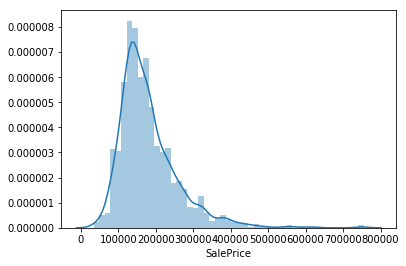

In [230]:
ax = sns.distplot(y_train)
plt.show()

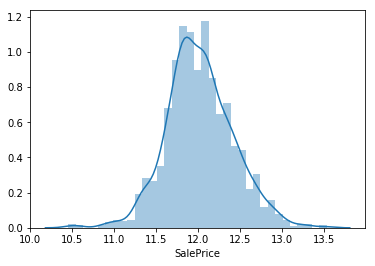

In [263]:
y_train = np.log(y_train)
ax = sns.distplot(y_train)
plt.show()

In [264]:
X_train = X_train.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
X_train = X_train.fillna(X_train.median())
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']

Training done using Random Forest


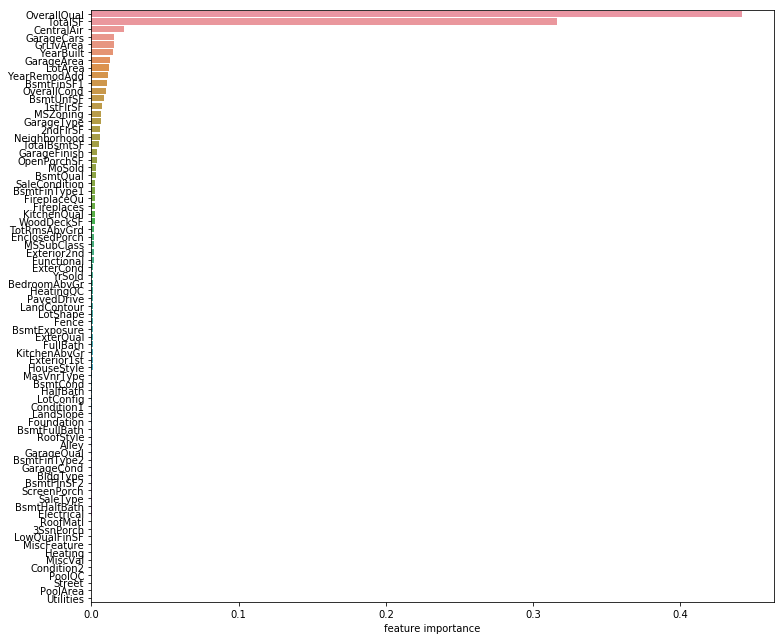

In [265]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [266]:
X_test = X_test.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
X_test = X_test.fillna(X_test.median())

In [267]:
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']

In [268]:
# use the top 30 features only
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

# interaction between the top 2
X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]

In [269]:
X_train.head()

,OverallQual,TotalSF,CentralAir,GarageCars,GrLivArea,YearBuilt,GarageArea,LotArea,YearRemodAdd,BsmtFinSF1,OverallCond,BsmtUnfSF,1stFlrSF,MSZoning,GarageType,2ndFlrSF,Neighborhood,TotalBsmtSF,GarageFinish,OpenPorchSF,MoSold,BsmtQual,SaleCondition,BsmtFinType1,FireplaceQu,Fireplaces,KitchenQual,WoodDeckSF,TotRmsAbvGrd,EnclosedPorch,Interaction
0,7,2566,1,2,1710,2003,548,8450,2003,706,5,150,856,3,1,854,5,856,1,61,2,2,4,2,5,0,2,0,8,0,17962
1,6,2524,1,2,1262,1976,460,9600,1976,978,8,284,1262,3,1,0,24,1262,1,0,5,2,4,0,4,1,3,298,6,0,15144
2,7,2706,1,2,1786,2001,608,11250,2002,486,5,434,920,3,1,866,5,920,1,42,9,2,4,2,4,1,2,0,6,0,18942
3,7,2473,1,3,1717,1915,642,9550,1970,216,5,540,961,3,5,756,6,756,2,35,2,3,0,0,2,1,2,0,7,272,17311
4,8,3343,1,3,2198,2000,836,14260,2000,655,5,490,1145,3,1,1053,15,1145,1,84,12,2,4,2,4,1,2,192,9,0,26744


In [270]:
X_test.head()

,OverallQual,TotalSF,CentralAir,GarageCars,GrLivArea,YearBuilt,GarageArea,LotArea,YearRemodAdd,BsmtFinSF1,OverallCond,BsmtUnfSF,1stFlrSF,MSZoning,GarageType,2ndFlrSF,Neighborhood,TotalBsmtSF,GarageFinish,OpenPorchSF,MoSold,BsmtQual,SaleCondition,BsmtFinType1,FireplaceQu,Fireplaces,KitchenQual,WoodDeckSF,TotRmsAbvGrd,EnclosedPorch,Interaction
0,5,1778.0,1,1.0,896,1961,730.0,11622,1961,468.0,6,270.0,896,2,1,0,12,882.0,2,0,6,3,4,4,5,0,3,140,5,0,8890.0
1,6,2658.0,1,1.0,1329,1958,312.0,14267,1958,923.0,6,406.0,1329,3,1,0,12,1329.0,2,36,6,3,4,0,5,0,2,393,6,0,15948.0
2,5,2557.0,1,2.0,1629,1997,482.0,13830,1998,791.0,5,137.0,928,3,1,701,8,928.0,0,34,3,2,4,2,4,1,3,212,6,0,12785.0
3,6,2530.0,1,2.0,1604,1998,470.0,9978,1998,602.0,6,324.0,926,3,1,678,8,926.0,0,36,6,3,4,2,2,1,2,360,7,0,15180.0
4,8,2560.0,1,2.0,1280,1992,506.0,5005,1992,263.0,5,1017.0,1280,3,1,0,22,1280.0,1,82,1,2,4,0,5,0,2,0,5,0,20480.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


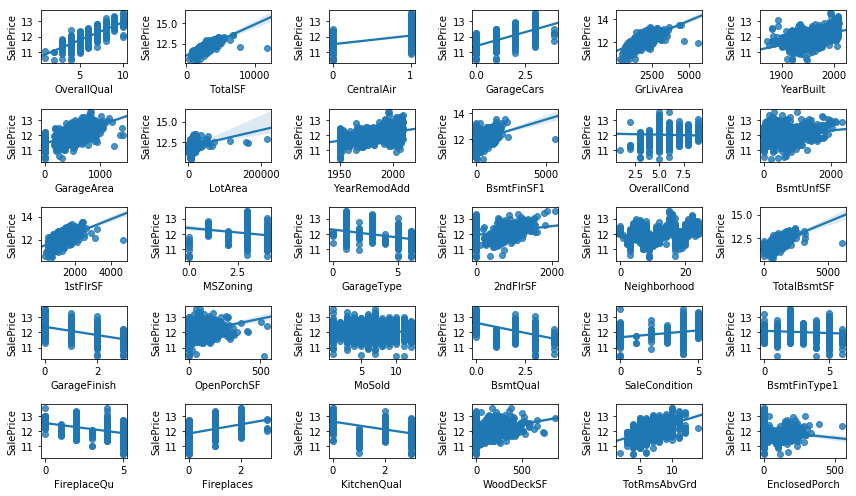

In [271]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [251]:
Xmat = X_train
Xmat['SalePrice'] = y_train
#Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>5) & (Xmat['SalePrice']<12.5)].index)
#Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [256]:
Xmat

,OverallQual,TotalSF,CentralAir,GarageCars,GrLivArea,YearBuilt,LotArea,GarageArea,YearRemodAdd,BsmtFinSF1,1stFlrSF,OverallCond,BsmtUnfSF,Neighborhood,GarageType,2ndFlrSF,MSZoning,TotalBsmtSF,BsmtQual,MoSold,OpenPorchSF,FireplaceQu,GarageFinish,KitchenQual,BsmtFinType1,WoodDeckSF,SaleCondition,EnclosedPorch,TotRmsAbvGrd,Exterior2nd,Interaction,SalePrice
178,9,4450,1,3,2234,2008,17423,1166,2009,1904,2234,5,312,22,1,0,3,2216,0,7,60,2,0,0,2,0,5,0,9,13,40050,13.126031
185,10,4143,1,3,3608,1892,22950,840,1993,0,1518,9,1107,17,5,1518,4,1107,3,6,260,4,2,0,5,0,4,0,12,14,41430,13.071070
440,10,5496,1,3,2402,2008,15431,672,2008,1767,2402,5,788,16,1,0,3,3094,0,4,72,2,0,0,2,0,4,0,10,13,54960,13.226723
527,9,4165,1,3,2713,2008,14948,858,2008,1330,1476,5,122,16,1,1237,3,1452,0,11,66,2,0,0,2,126,5,0,11,13,37485,13.008659
591,10,4018,1,3,2296,2008,13478,842,2008,1338,1728,5,384,16,3,568,3,1722,0,6,274,2,1,0,2,382,4,0,10,5,40180,13.021327
691,10,6760,1,3,4316,1994,21535,832,1995,1455,2444,6,989,15,1,1872,3,2444,0,1,50,0,0,0,2,382,4,0,10,6,67600,13.534473
769,8,4929,1,3,3279,2003,53504,841,2003,1416,1690,5,234,22,3,1589,3,1650,2,6,36,2,0,0,0,503,4,0,12,15,39432,13.195614
798,9,5066,1,3,3140,2008,13518,820,2009,0,1966,5,1926,16,3,1174,3,1926,0,7,78,2,0,0,5,144,5,0,11,13,45594,13.091904
803,9,4556,1,3,2822,2008,13891,1020,2009,0,1734,5,1734,16,3,1088,3,1734,0,1,170,2,1,0,5,52,5,0,12,13,41004,13.275828
898,9,4694,1,3,2364,2009,12919,820,2010,2188,2364,5,142,16,1,0,3,2330,0,3,67,2,0,0,2,0,5,0,11,13,42246,13.323927


In [253]:
# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

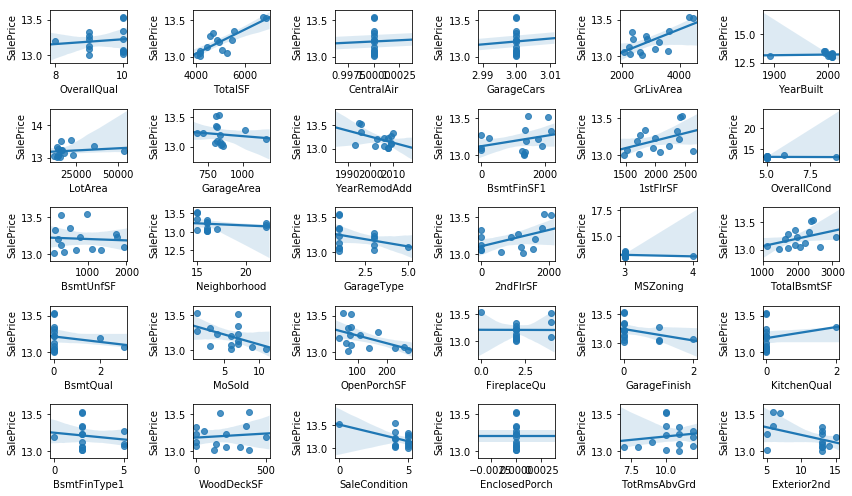

In [254]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

len(X_train)

In [273]:
X_train['TotalSF'].sort_values()

533       334
1321      720
1100      728
532       827
1035      845
259       882
392       882
1218      912
1049      930
1000      944
916       960
710       999
872      1015
29       1040
125      1040
1090     1040
342      1040
156      1040
736      1040
90       1040
1412     1040
646      1048
636      1064
494      1076
705      1092
1179     1124
553      1126
1323     1128
528      1133
438      1134
        ...  
1205     4354
58       4355
888      4434
70       4446
178      4450
1024     4463
529      4550
1175     4555
803      4556
349      4576
642      4656
898      4694
224      4784
477      4796
332      4835
1046     4860
118      4895
769      4929
304      4963
1044     5048
798      5066
1373     5266
1353     5271
440      5496
1169     5557
496      6428
691      6760
1182     6872
523      7814
1298    11752
Name: TotalSF, Length: 1460, dtype: int64

In [274]:
X_train.drop(X_train['TotalSF'] > 7000)

,OverallQual,TotalSF,CentralAir,GarageCars,GrLivArea,YearBuilt,GarageArea,LotArea,YearRemodAdd,BsmtFinSF1,OverallCond,BsmtUnfSF,1stFlrSF,MSZoning,GarageType,2ndFlrSF,Neighborhood,TotalBsmtSF,GarageFinish,OpenPorchSF,MoSold,BsmtQual,SaleCondition,BsmtFinType1,FireplaceQu,Fireplaces,KitchenQual,WoodDeckSF,TotRmsAbvGrd,EnclosedPorch,Interaction


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


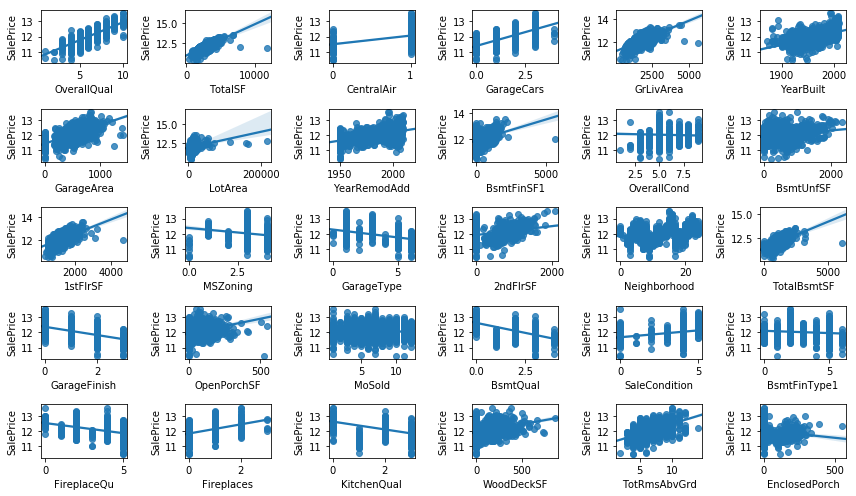

In [279]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [280]:
X_train[X_train['TotalSF'] > 7000].index

Int64Index([523, 1298], dtype='int64')

In [281]:
X_train = X_train.drop(X_train[X_train['TotalSF'] > 7000].index)

In [282]:
X_train[X_train['TotalSF'] > 7000].index

Int64Index([], dtype='int64')

In [285]:
X_train[X_train['GrLivArea'] > 5000]

,OverallQual,TotalSF,CentralAir,GarageCars,GrLivArea,YearBuilt,GarageArea,LotArea,YearRemodAdd,BsmtFinSF1,OverallCond,BsmtUnfSF,1stFlrSF,MSZoning,GarageType,2ndFlrSF,Neighborhood,TotalBsmtSF,GarageFinish,OpenPorchSF,MoSold,BsmtQual,SaleCondition,BsmtFinType1,FireplaceQu,Fireplaces,KitchenQual,WoodDeckSF,TotRmsAbvGrd,EnclosedPorch,Interaction


In [289]:
y_train = y_train.drop([523, 1298])

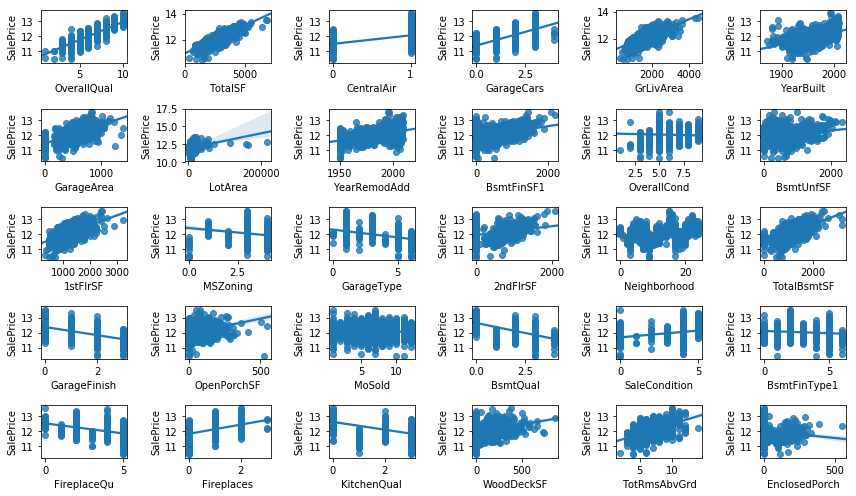

In [290]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [293]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train)

Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [294]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/Keras-2.2.4-py3.6.egg/keras/callbacks.py:122: UserWarning: In your callbacks, method `on_batch_end()` is slow compared to a model step (0.112147 vs 0.014760). Check your callbacks.
/opt/conda/lib/python3.6/site-packages/Keras-2.2.4-py3.6.egg/keras/callbacks.py:122: UserWarning: In your callbacks, method `on_batch_end()` is slow compared to a model step (0.121545 vs 0.006939). Check your callbacks.
Process ForkPoolWorker-10:
Process ForkPoolWorker-7:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:


KeyboardInterrupt: 

In [295]:
# SVR
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [296]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
     'SVR': reg_svr.predict(X_train),
    })

In [297]:
X_train2

,XGB,SVR
0,12.226992,12.147617
1,12.121601,12.031889
2,12.249921,12.217122
3,11.906230,11.949430
4,12.592124,12.329233
5,11.941751,11.970638
6,12.540444,12.534915
7,12.317862,12.105637
8,11.866140,11.874437
9,11.840464,11.778847


In [298]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'SVR': reg_svr.predict(X_test),
    })

# Don't forget to convert the prediction back to non-log scale
y_pred = np.exp(reg.predict(X_test2))

# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice.csv', index=False)